# Colormaps

###0. Resources

You can view all the colormaps available here:
http://matplotlib.org/examples/color/colormaps_reference.html

And a discussion of their performance when printed in black and white here:
http://matplotlib.org/users/colormaps.html

In [52]:
%matplotlib inline
import matplotlib
import numpy
import pylab
from matplotlib import cm, colors as mplcolors

mplversion = matplotlib.__version__
print 'You are using matplotlib version {0}'.format(mplversion)

You are using matplotlib version 1.5.1


###1. The good, the bad and the ugly

In [55]:
# choose a few colormaps
cmaps = ('jet', 'spectral', 'gist_heat', 'gray', 'viridis')
# make a grid of points
x = numpy.linspace(-10, 10, 1000)
y = numpy.linspace(-10, 10, 1000)
x, y = numpy.meshgrid(x, y)

# plot the data using the different colormaps
def show_img(t):
    fig, axes = pylab.subplots(figsize=(4*len(cmaps),4), ncols=len(cmaps))
    for ax, cmap in zip(axes, cmaps):
        img = ax.imshow(t, origin='lower', interpolation='none',
                        cmap=cmap)
        ax.set_title(cmap, fontsize=18)
        ax.set_xticks([])
        ax.set_yticks([])
    return

## $z = \exp\left[-\frac{x^2+y^2}{2\sigma^2}\right]$

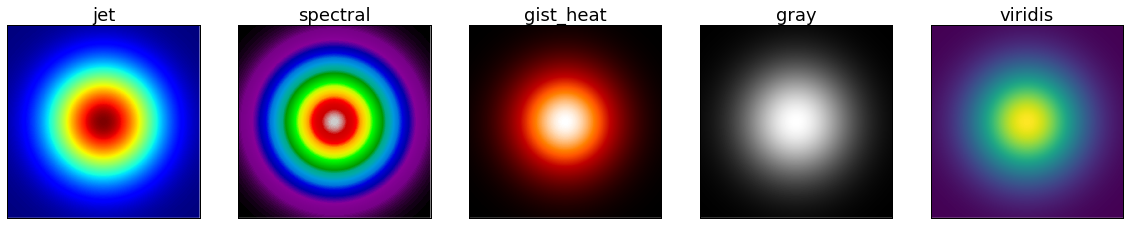

In [66]:
z = numpy.exp(-(x**2+y**2)/(2*4**2))
show_img(z)

would you guess from the first three (without colorbars) that this is a smooth, monotonic function towards the center?

## $z = \exp\left[-\frac{x^2+y^2}{2\sigma^2}\right] \cos\left(x^2+y^2\right)$

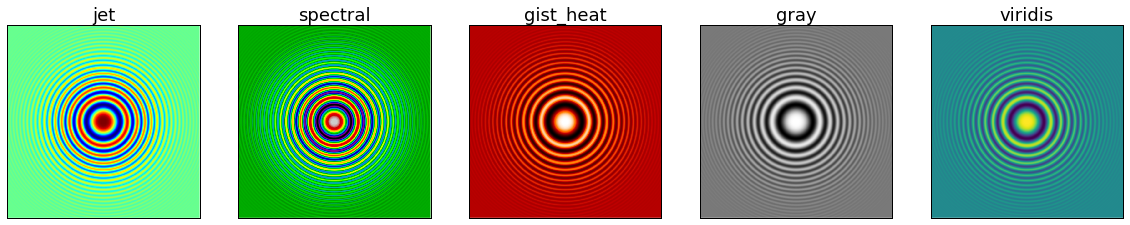

In [67]:
z1 = z * numpy.cos(x**2 + y**2)
show_img(z1)

"jet" cannot display too many waves since there is nearly no variation in lightness within its green band. "Spectral", "gray" and "viridis" best show the fading wings in this function.

## $z = \cos\left(x^2 + y^2\right),\,\,{\rm with}\,\,-2\pi \leq x,y \leq 2\pi$

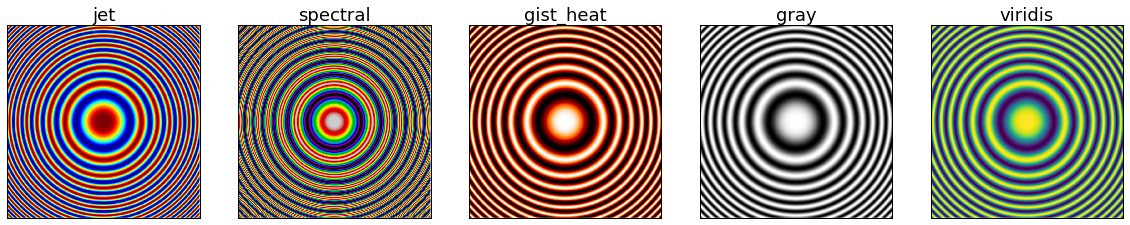

In [68]:
z2 = numpy.cos((6.28*x/x.max())**2 + (6.28*y/y.max())**2)
show_img(z2)

## $z = \cos\left(x^2 + y^2\right),\,\,{\rm with}\,\,-10 \leq x,y \leq 10$

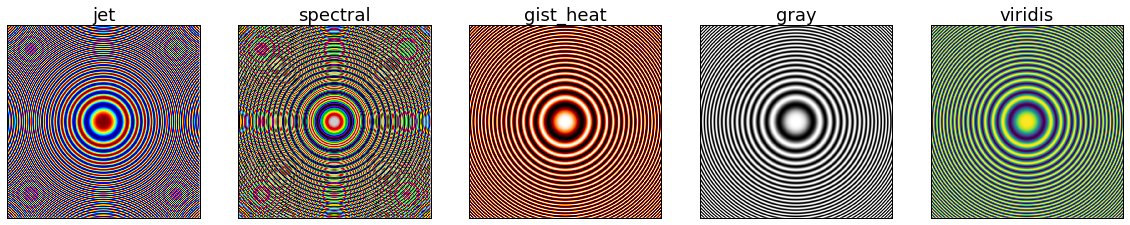

In [69]:
z3 = numpy.cos(x**2 + y**2)
show_img(z3)

the aliasing patterns caused, caused by poor sampling, are terrible in "jet" and especially in "spectral", and almost non existent for the other three

###2. Picking colors from a colormap

In [60]:
# new colormaps (viridis, plasma, magma, inferno) only available in matplotlib>=1.5.0
if float(mplversion[:3]) >= 1.5:
    cmap = cm.viridis
else:
    # if you have the attached colormaps.py
    try:
        import colormaps
        cmap = colormaps.viridis
    except ImportError:
        cmap = cm.cubehelix
#cmap = cm.cubehelix

[[ 0.267004  0.004874  0.329415  1.      ]
 [ 0.280894  0.078907  0.402329  1.      ]
 [ 0.28229   0.145912  0.46151   1.      ]
 [ 0.270595  0.214069  0.507052  1.      ]
 [ 0.250425  0.27429   0.533103  1.      ]
 [ 0.223925  0.334994  0.548053  1.      ]
 [ 0.19943   0.387607  0.554642  1.      ]
 [ 0.175841  0.44129   0.557685  1.      ]
 [ 0.15627   0.489624  0.557936  1.      ]
 [ 0.136408  0.541173  0.554483  1.      ]
 [ 0.121831  0.589055  0.545623  1.      ]
 [ 0.12478   0.640461  0.527068  1.      ]
 [ 0.162016  0.687316  0.499129  1.      ]
 [ 0.239374  0.735588  0.455688  1.      ]
 [ 0.335885  0.777018  0.402049  1.      ]
 [ 0.458674  0.816363  0.329727  1.      ]
 [ 0.585678  0.846661  0.249897  1.      ]
 [ 0.730889  0.871916  0.156029  1.      ]
 [ 0.866013  0.889868  0.095953  1.      ]
 [ 0.993248  0.906157  0.143936  1.      ]]


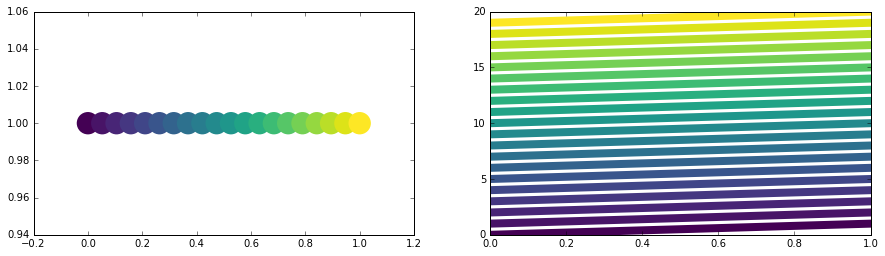

In [50]:
# normalize the colormap to arbitrary values
cnorm = mplcolors.Normalize(vmin=0, vmax=1)
# generate a "Scalar Mappable" from which colors can be extracted
scalar_map = cm.ScalarMappable(norm=cnorm, cmap=cmap)
# extract 10 uniformly-spaced colors from the colormap
rng = numpy.linspace(0, 1, 20)
colors = scalar_map.to_rgba(rng)
print colors

# show the colors in two versions
fig, axes = pylab.subplots(figsize=(15,4), ncols=2)
axes[0].scatter(rng, numpy.ones(len(rng)), c=colors, s=500, lw=0, marker='o')
for i in xrange(len(rng)):
    axes[1].plot(rng, rng+i, '-', color=colors[i], lw=8)

###3. Implement your own colormaps

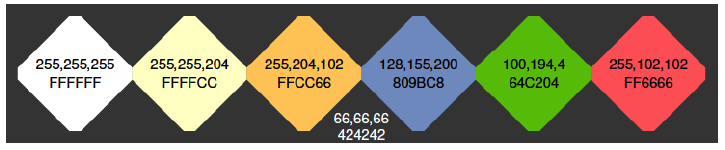

In [72]:
from IPython.display import Image
Image(filename='sron.png') 

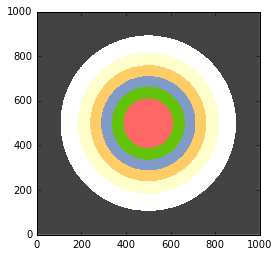

In [73]:
from matplotlib.colors import ListedColormap

cmap_data = numpy.array([[ 66,  66,  66],
                         [255, 255, 255],
                         [255, 255, 204],
                         [255, 204, 102],
                         [128, 155, 200],
                         [100, 194,   8],
                         [255, 102, 102]])
cmap_data = cmap_data / 255.
cmap = ListedColormap(cmap_data, name='sron')

pylab.imshow(z, origin='lower', interpolation='none', cmap=cmap)